In [13]:
import pandas as pd
import dask as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [2]:
df = pd.read_csv('JV_data_2002-2012.csv')

In [3]:
df['pdynamic'] = df['pdynamic'].map({'new_entrant': 1, 'incumbent': 0})
df['disc_dist'] = pd.to_numeric(df['disc_dist'])

## Assumption Testing

1. Appropriate outcome type
2. Linearity of independent variables and log-odds
3. No strongly influential outliers
4. Absence of multicollinearity
5. Independence of observations
6. Sufficiently large sample size

### Assumption 2: Continuous IV is linearly related to the log odds

In [6]:
#Prepped data to R 
df.to_csv('prepped-r.csv')

#### Results from R:

In [ ]:
 MLE of lambda Score Statistic (z) Pr(>|z|)
        4.1824             -1.2029    0.229

p-value = 0.229, which is >0.05 (meaning that it is statistically not significant)
This means that there is linearity in the Discontinuity Distance feature, and the assumption has not violated

#### Another visual check

In [11]:
y = df['pdynamic']
X = df['disc_dist']
X_constant = sm.add_constant(X, prepend=False)

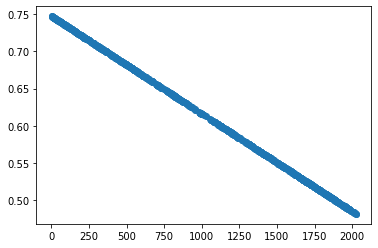

In [15]:
# Re-run logistic regression on original set of X and y variables
logit_results = GLM(y, X_constant, family=families.Binomial()).fit()
predicted = logit_results.predict(X_constant)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X_constant['disc_dist'].values, y=log_odds);
plt.show()

### Assumption 3: Lack of outliers

## Logistic Regression Model

In [13]:
model = smf.logit(formula="pdynamic~ disc_dist", data= df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.647813
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pdynamic   No. Observations:                  989
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jun 2022   Pseudo R-squ.:                0.001209
Time:                        23:56:22   Log-Likelihood:                -640.69
converged:                       True   LL-Null:                       -641.46
Covariance Type:            nonrobust   LLR p-value:                    0.2129
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7473      0.129      5.790      0.000       0.494       1.000
disc_dist     -0.0001      0.000     -1.244      0.213      -0.000    7.54e-05
==============================================================================
"""